In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'RLC sottosmorzato.csv'
fr = pd.read_csv(FILE)

In [2]:
t = np.array(fr['t (us)']) * 10**-6
V = np.array(fr['V (mV)']) * 10**-3

   
Parameters: [5.05427606e-01 1.05276284e+03 1.07545384e+04] 
Sigma parameters: [3.03333669e-03 1.16515832e+01 9.42947119e+00]

sigmaY: 0.01

chiquadro ridotto: 0.7
df: 106
pvalue: 100.0%
covariance matrix: [[ 8.70161715e-06  2.51278425e-02 -2.46511963e-05]
 [ 2.51278425e-02  1.28389236e+02  5.01366072e+00]
 [-2.46511963e-05  5.01366072e+00  8.40878814e+01]]    



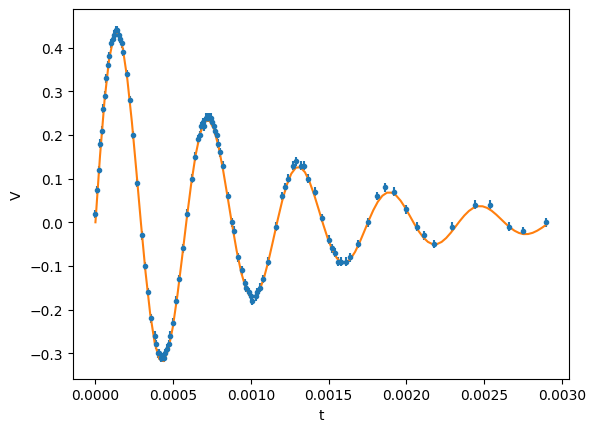

In [3]:
def Vsmorz(t,V0,γ,β):
    return V0*np.exp(-γ*t)*np.sin(β*t)

C = 0.000000099
R = 60
L = 0.082

w2 = 1 / (L*C)
γ = R / (2*L)
β = np.sqrt(w2 - γ**2)
# print(w2,γ,β)

i = Interpolazione(t,V,Vsmorz,0.010,p0=[3.96,γ,np.sqrt(w2 - γ**2)])
print(i)

# x = np.linspace(min(t),max(t),100)
# y = Vsmorz(x,4,γ,β)
# plt.plot(x,y)
plt.errorbar(t, V, yerr=0.01, fmt='.')
plt.plot(i.x_best,i.y_best)
plt.xlabel('t')
plt.ylabel('V')
plt.show()



In [4]:
print(γ,np.sqrt(w2)) # gamma < w

365.8536585365853 11098.785970200448
